In [268]:
################################################################################
# Import modules
#-------------------------------------------------------------------------------
import numpy as np
import numpy.ma as ma
from astropy.table import Table, QTable
import matplotlib.pyplot as plt

import csv

import time


# Import functions from other .py files
from Velocity_Map_Functions import rot_incl_iso,\
                                   rot_incl_NFW, \
                                   rot_incl_bur,\
                                   find_phi

from RC_2D_Fit_Functions import Galaxy_Data, \
                                Galaxy_Fitting_iso,\
                                Galaxy_Fitting_NFW, \
                                Galaxy_Fitting_bur, \
                                Hessian_Calculation_Isothermal,\
                                Hessian_Calculation_NFW,\
                                Hessian_Calculation_Burket,\
                                Plotting_Isothermal,\
                                Plotting_NFW,\
                                Plotting_Burket

from mapSmoothness_functions import how_smooth
import os.path
from os import path
################################################################################

In [269]:
################################################################################
# Physics Constants
#-------------------------------------------------------------------------------
c = 3E5 # km * s ^1
h = 1 # reduced hubble constant
H_0 =  100 * h # km * s^-1 * Mpc^-1
################################################################################

################################################################################
# Used files
#-------------------------------------------------------------------------------

MANGA_FOLDER = '/Users/richardzhang/Documents/UR_Stuff/Research_UR/SDSS/dr16/manga/spectro/'
DRP_FILENAME = MANGA_FOLDER + 'redux/v2_4_3/drpall-v2_4_3.fits'
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/'
################################################################################

In [270]:
################################################################################
# Get the Mass of stars & redshifts & angular resolution of r50
#-------------------------------------------------------------------------------
m = DTable['nsa_elpetro_mass']
rat = DTable['nsa_elpetro_ba']
phi = DTable['nsa_elpetro_phi']
z = DTable['nsa_z']
r50_ang = DTable['nsa_elpetro_th50_r']
################################################################################

In [271]:
DTable =  Table.read(DRP_FILENAME, format='fits')

DRP_index = {}

for i in range(len(DTable)):
    gal_ID = DTable['plateifu'][i]

    DRP_index[gal_ID] = i

In [272]:
iso_fits = []
ct_iso = 0
f_iso = open('iso_fit_old.csv','r')
reader_iso = csv.reader(f_iso)
for row in reader_iso:
    #print(row)
    ct_iso += 1
    if ct_iso >= 2:
        iso_fits.append(row)
iso_fits, len(iso_fits)

([['7443-1901',
   '6.61079612857891e-05',
   '0.0010415640573529937',
   '9999.984339106497',
   '8.130679891895912',
   '0.0999600929039856',
   '0.681601041338736',
   '0.17290494522548897',
   '4.169304213708331',
   '15.713946189186334',
   '14.638490310166135',
   '8.33103433738336'],
  ['7443-1902',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3701',
   '6.610796128614206e-05',
   '0.0010221648742434833',
   '332.4963810729046',
   '10.205754645626067',
   '0.007197168260000381',
   '1.004644557306689',
   '1.0914236227297087',
   '2.5346949975330664',
   '18.924077864733462',
   '21.044374738660146',
   '47.71226783341036'],
  ['7443-3702',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3703',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3704',
   '0.63162591

In [273]:
nfw_fits = []
ct_nfw = 0
f_nfw = open('nfw_fit_old.csv','r')
reader_nfw = csv.reader(f_nfw)
for row in reader_nfw:
    #print(row)
    ct_nfw += 1
    if ct_nfw >= 2:
        nfw_fits.append(row)
nfw_fits, len(nfw_fits)

([['7443-1901',
   '0.9999338930387142',
   '999.9999549146047',
   '9999.999962623142',
   '6.6124241369728445',
   '0.09996009381818072',
   '99.99994736828594',
   '0.10006009136804783',
   '4.014072449286692',
   '32.552571504999406',
   '29.999954434971393',
   '61.43825054358884'],
  ['7443-1902',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3701',
   '6.610796128578908e-05',
   '0.0010451058186643502',
   '902.4170352301927',
   '1.6013923360521418',
   '0.00024795739601050405',
   '0.10000271449253172',
   '0.4466366224929992',
   '2.6685932343327066',
   '16.998231807707295',
   '23.4329543893083',
   '26.415488755985354'],
  ['7443-3702',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3703',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3704',
   '6.61045471

In [274]:
bur_fits = []
ct_bur = 0
f_bur = open('bur_fit_old.csv','r')
reader_bur = csv.reader(f_bur)
for row in reader_bur:
    #print(row)
    ct_bur += 1
    if ct_bur >= 2:
        bur_fits.append(row)
bur_fits, len(bur_fits)

([['7443-1901',
   '0.9999338930387142',
   '999.9999549146047',
   '9999.999962623142',
   '6.612373752279119',
   '0.09996009381818072',
   '99.99994736828594',
   '1.5191398712406512',
   '4.0329017458161776',
   '32.46759335101947',
   '29.99996550070327',
   '34.23994927282143'],
  ['7443-1902',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3701',
   '0.9999338930387146',
   '0.6283893882859367',
   '303.1390395364178',
   '12.425996282148038',
   '0.022593338177627844',
   '1.8467661836867857',
   '1.1990461630034794',
   '2.5555227851848312',
   '18.396747100700146',
   '20.85814969491692',
   '49.14070302216135'],
  ['7443-3702',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3703',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A',
   'N/A'],
  ['7443-3704',
   '0.9999997734224753',
 

In [275]:
galaxy_ID = []
plate = ['7443']
IFU = ['1901','1902','3701','3702','3703','3704','6101','6102','6103','6104','9101','9102','12701','12702','12703','12704','12705']
for i in range(len(plate)):
    for j in range(len(IFU)):
        galaxy_ID.append(plate[i]+'-'+IFU[j])
galaxy_ID, len(galaxy_ID)

(['7443-1901',
  '7443-1902',
  '7443-3701',
  '7443-3702',
  '7443-3703',
  '7443-3704',
  '7443-6101',
  '7443-6102',
  '7443-6103',
  '7443-6104',
  '7443-9101',
  '7443-9102',
  '7443-12701',
  '7443-12702',
  '7443-12703',
  '7443-12704',
  '7443-12705'],
 17)

# Test on data model

In [276]:
iso_fits_3704 = iso_fits[5]
del iso_fits_3704[0]
iso_fits_3704

['0.6316259176852005',
 '13.499967965181582',
 '9470.289344872112',
 '5.829251935271229',
 '0.00013892943292039467',
 '99.99999523914529',
 '0.1883081286824339',
 '0.9710948282722175',
 '19.45314728219209',
 '24.940098336965047',
 '12.518454447012026']

In [277]:
for i in range(len(iso_fits_3704)):
    iso_fits_3704[i] = float(iso_fits_3704[i])
iso_fits_3704[10] = -4.38
iso_fits_3704

[0.6316259176852005,
 13.499967965181582,
 9470.289344872112,
 5.829251935271229,
 0.00013892943292039467,
 99.99999523914529,
 0.1883081286824339,
 0.9710948282722175,
 19.45314728219209,
 24.940098336965047,
 -4.38]

In [278]:
nfw_fits_3704 = nfw_fits[5]
del nfw_fits_3704[0]
nfw_fits_3704

['6.610454712431298e-05',
 '0.001045033857570487',
 '8155.195156074614',
 '6.384316227639777',
 '0.005303973145720504',
 '99.99999999993125',
 '0.1764959428090009',
 '0.9705612589199876',
 '20.442538556795807',
 '25.137348383863152',
 '12.995588628802974']

In [279]:
for i in range(len(nfw_fits_3704)):
    nfw_fits_3704[i] = float(nfw_fits_3704[i])
nfw_fits_3704
nfw_fits_3704[10] = 3.09
nfw_fits_3704

[6.610454712431298e-05,
 0.001045033857570487,
 8155.195156074614,
 6.384316227639777,
 0.005303973145720504,
 99.99999999993125,
 0.1764959428090009,
 0.9705612589199876,
 20.442538556795807,
 25.137348383863152,
 3.09]

In [280]:
bur_fits_3704 = bur_fits[5]
del bur_fits_3704[0]
bur_fits_3704

['0.9999997734224753',
 '10.63147468928825',
 '9230.938034906108',
 '14.058467976585742',
 '0.0001399056164306106',
 '0.8481800431709292',
 '0.2349793892152172',
 '0.9460403318669846',
 '18.50462937994483',
 '23.634243495265704',
 '14.39925314048265']

In [281]:
for i in range(len(bur_fits_3704)):
    bur_fits_3704[i] = float(bur_fits_3704[i])
bur_fits_3704[10] = 3.65
bur_fits_3704

[0.9999997734224753,
 10.63147468928825,
 9230.938034906108,
 14.058467976585742,
 0.0001399056164306106,
 0.8481800431709292,
 0.2349793892152172,
 0.9460403318669846,
 18.50462937994483,
 23.634243495265704,
 3.65]

In [282]:
r_band, Ha_vel, Ha_vel_ivar, Ha_vel_mask, Ha_flux, Ha_flux_ivar, Ha_flux_mask, vmasked, Ha_flux_masked, ivar_masked, gshape, x_center_guess, y_center_guess = Galaxy_Data(galaxy_ID[5])

In [283]:
j = DRP_index[galaxy_ID[5]]

redshift = z[j]
velocity =  redshift* c
distance = (velocity / H_0) * 1E3 #kpc
scale = 0.5 * (distance) / 206265

In [1]:
def get_data(nlist):
    del nlist[0]
    del nlist[-1]
    return nlist

In [ ]:
# Get fit solutions
#f_iso = open('iso.csv','r')
#f_nfw = open('nfw.csv','r')
#f_bur = open('bur.csv','r')

In [ ]:
def galaxy_analysis(vmasked, gshape, scale, fit_sol, Ha_flux, Ha_flux_ivar, mask):
    plt.figure(figsize=(20,10))

    # Data with mask
    plt.subplot(251)
    plt.imshow(vmasked, origin='lower',cmap='RdBu_r')
    plt.title('data')

    # Isothermal model
    plt.subplot(252)
    vmap_iso = np.array(rot_incl_iso(gshape,scale,fit_sol))
    vmasked_model_iso = ma.array(vmap_iso,mask=Ha_vel_mask)
    plt.imshow(vmasked_model_iso, origin='lower',cmap='RdBu_r')
    plt.title('Isothermal model')

    
    plt.subplot(253)
    vmap_nfw = np.array(rot_incl_NFW(gshape,scale,fit_sol))
    vmasked_model_nfw = ma.array(vmap_nfw,mask=Ha_vel_mask)
    plt.imshow(vmasked_model_nfw, origin='lower',cmap='RdBu_r')
    plt.title('NFW model')

    plt.subplot(254)
    vmap_bur = np.array(rot_incl_bur(gshape,scale,fit_sol))
    vmasked_model_bur = ma.array(vmap_bur,mask=Ha_vel_mask)
    plt.imshow(vmasked_model_bur, origin='lower',cmap='RdBu_r')
    plt.title('Burket model')

    # Data with S/N > 5
    plt.subplot(255)
    SN_map = Ha_flux * np.sqrt(Ha_flux_ivar)
    Ha_vel_mask = Ha_vel_mask + (SN_map < 5)
    vmasked_SN5 = ma.array(Ha_vel, mask = Ha_vel_mask)
    plt.imshow(vmasked_SN5, origin='lower',cmap='RdBu_r')
    plt.title('S/N > 5')

    # Get residual Isothermal
    plt.subplot(256)
    residual_BB_iso = np.max(np.abs(vmasked_model_iso - vmasked))
    plt.imshow(vmasked_model_iso - vmasked, 
               origin='lower', 
               cmap='PiYG_r', 
               vmin=-residual_BB_iso, 
               vmax=residual_BB_iso)
    plt.colorbar()
    plt.title('Residual (model - data) Isothermal')
    
    # Get residual NFW
    plt.subplot(257)
    residual_BB_nfw = np.max(np.abs(vmasked_model_nfw - vmasked))
    plt.imshow(vmasked_model_nfw - vmasked, 
               origin='lower', 
               cmap='PiYG_r', 
               vmin=-residual_BB_nfw, 
               vmax=residual_BB_nfw)
    plt.colorbar()
    plt.title('Residual (model - data) NFW')
    
    # Get residual Burket
    plt.subplot(258)
    residual_BB_bur = np.max(np.abs(vmasked_model_bur - vmasked))
    plt.imshow(vmasked_model_bur - vmasked, 
               origin='lower', 
               cmap='PiYG_r', 
               vmin=-residual_BB_bur, 
               vmax=residual_BB_bur)
    plt.colorbar()
    plt.title('Residual (model - data) Burket')

Text(0.5, 1.0, 'Residual (model - data) Burket')

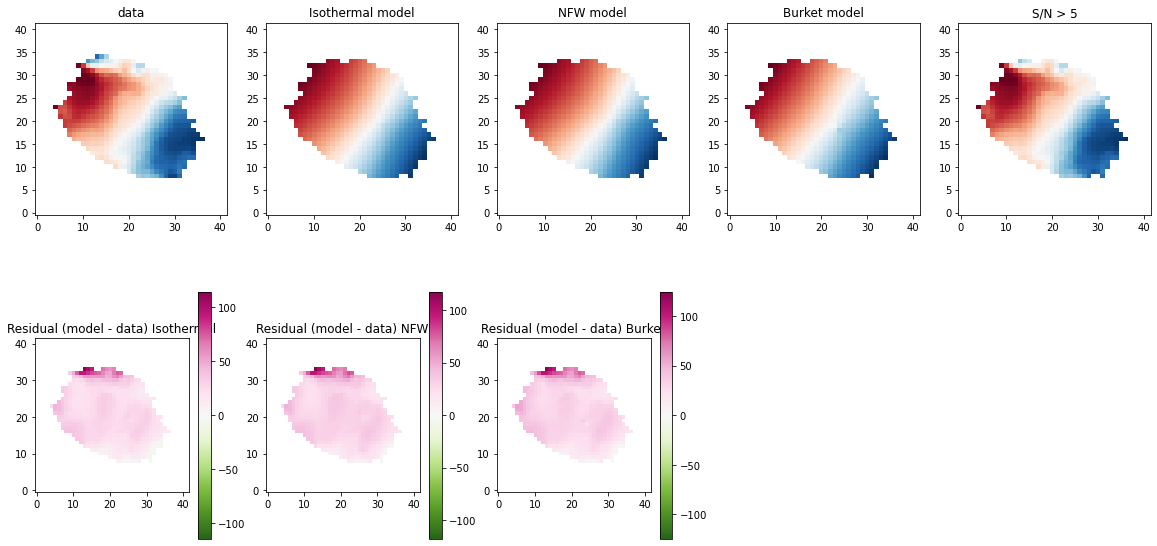

In [286]:
plt.figure(figsize=(20,10))

plt.subplot(251)
plt.imshow(vmasked, origin='lower',cmap='RdBu_r')
plt.title('data')

plt.subplot(252)
vmap_iso = np.array(rot_incl_iso(gshape,scale,iso_fits_3704))
vmasked_model_iso = ma.array(vmap_iso,mask=Ha_vel_mask)
plt.imshow(vmasked_model_iso, origin='lower',cmap='RdBu_r')
plt.title('Isothermal model')

plt.subplot(253)
vmap_nfw = np.array(rot_incl_NFW(gshape,scale,nfw_fits_3704))
vmasked_model_nfw = ma.array(vmap_nfw,mask=Ha_vel_mask)
plt.imshow(vmasked_model_nfw, origin='lower',cmap='RdBu_r')
plt.title('NFW model')

plt.subplot(254)
vmap_bur = np.array(rot_incl_bur(gshape,scale,bur_fits_3704))
vmasked_model_bur = ma.array(vmap_bur,mask=Ha_vel_mask)
plt.imshow(vmasked_model_bur, origin='lower',cmap='RdBu_r')
plt.title('Burket model')

plt.subplot(255)
SN_map = Ha_flux * np.sqrt(Ha_flux_ivar)
Ha_vel_mask = Ha_vel_mask + (SN_map < 5)
vmasked_SN5 = ma.array(Ha_vel, mask = Ha_vel_mask)
plt.imshow(vmasked_SN5, origin='lower',cmap='RdBu_r')
plt.title('S/N > 5')

plt.subplot(256)
residual_BB_iso = np.max(np.abs(vmasked_model_iso - vmasked))
plt.imshow(vmasked_model_iso - vmasked, 
           origin='lower', 
           cmap='PiYG_r', 
           vmin=-residual_BB_iso, 
           vmax=residual_BB_iso)
plt.colorbar()
plt.title('Residual (model - data) Isothermal')

plt.subplot(257)
residual_BB_nfw = np.max(np.abs(vmasked_model_nfw - vmasked))
plt.imshow(vmasked_model_nfw - vmasked, 
           origin='lower', 
           cmap='PiYG_r', 
           vmin=-residual_BB_nfw, 
           vmax=residual_BB_nfw)
plt.colorbar()
plt.title('Residual (model - data) NFW')

plt.subplot(258)
residual_BB_bur = np.max(np.abs(vmasked_model_bur - vmasked))
plt.imshow(vmasked_model_bur - vmasked, 
           origin='lower', 
           cmap='PiYG_r', 
           vmin=-residual_BB_bur, 
           vmax=residual_BB_bur)
plt.colorbar()
plt.title('Residual (model - data) Burket')